# Métodos ensemble:

1. Cargar los datos MNIST y dividirlos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de test (por ejemplo, utilizar 50.000 instancias para entrenamiento, 10.000 para validación y 10.000 para pruebas). Luego, entrenar varios clasificadores, como un clasificador Random Forest, un clasificador Extra-Trees y un clasificador SVM. A continuación, intentar combinarlos en un conjunto que supere a cada (Cambiando SVM por HistGradientBoostingClassifier) clasificador individual en el conjunto de validación, utilizando votación soft o hard. Una vez que haya encontrado uno, probarlo en el conjunto de pruebas. ¿Cuánto mejor se desempeña en comparación con los clasificadores individuales?

2. Ejecutar los clasificadores individuales del ejercicio anterior para hacer predicciones en el conjunto de validación y crear un nuevo conjunto de entrenamiento con las predicciones resultantes: cada instancia de entrenamiento es un vector que contiene el conjunto de predicciones de todos los clasificadores para una imagen, y el objetivo es la clase de la imagen. Entrenar un clasificador en este nuevo conjunto de entrenamiento. ¡Felicidades, acaba de entrenar un blender, y junto con los clasificadores forma un conjunto de stacking! Ahora evaluar el conjunto en el conjunto de pruebas. Para cada imagen en el conjunto de pruebas, hacer predicciones con todos los clasificadores, y luego alimentar las predicciones al mezclador para obtener las predicciones del conjunto. ¿Cómo se compara con el clasificador de votación que entrenó anteriormente?

3. Realice el ejercicio 1. otra vez utilizando los algoritmo XGBoost, LightGBM y CatBoost.

# Reducción dimensional

1. Cargue el conjunto de datos MNIST (introducido en el capítulo 3) y divídalo en un conjunto de entrenamiento y un conjunto de pruebas (tome las primeras 60,000 instancias para entrenamiento y las 10,000 restantes para test). Entrene un clasificador Random Forest en el conjunto de datos y tome el tiempo que tarda, luego evalúe el modelo resultante en el conjunto de test. A continuación, use PCA para reducir la dimensionalidad del conjunto de datos, con una relación de varianza explicada del 95%. Entrenar un nuevo clasificador Random Forest en el conjunto de datos reducido y ver cuánto tiempo tarda. ¿Fue el entrenamiento mucho más rápido? A continuación, evalúe el clasificador en el conjunto de pruebas. ¿Cómo se compara con el clasificador anterior?

2. Use t-SNE para reducir el conjunto de datos MNIST a dos dimensiones y grafique el resultado usando Matplotlib. Puede usar un gráfico de dispersión utilizando 10 colores diferentes para representar la clase objetivo de cada imagen. Alternativamente, puede reemplazar cada punto en el gráfico de dispersión con la clase correspondiente de la instancia (un dígito del 0 al 9), o incluso graficar versiones reducidas de las imágenes de dígitos en sí mismas (si grafica todos los dígitos, la visualización será demasiado desordenada, por lo que debe dibujar una muestra aleatoria o graficar una instancia solo si no se ha graficado otra instancia a una distancia cercana). Debería obtener una visualización con grupos de dígitos bien separados. Intente usar otros algoritmos de reducción de dimensionalidad como PCA, LLE o MDS y compare las visualizaciones resultantes.

In [1]:
#importar dataset
from sklearn.datasets import fetch_openml
import numpy as np

data=fetch_openml('mnist_784',version=1)
data.keys()
X=data['data']
y=data['target']

y=y.astype(np.uint8)

display(y)

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [2]:
#divido el dataset en conjunto de entrenamiento y prueba y validacion con 
#test size 10000
from sklearn.model_selection import train_test_split

X_prep, X_test, y_prep, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_prep, y_prep, test_size=10000, random_state=42)

In [5]:
#instancio el modelo de random forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier()

#Entreno el modelo
rnd_clf.fit(X_train, y_train)

#hago la prediccion con el conjunto de validacion
y_pred = rnd_clf.predict(X_val)
accuracy=accuracy_score(y_val, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9701


In [6]:
#Entreno el modelo de extraTrees
from sklearn.ensemble import ExtraTreesClassifier


ext_clf = ExtraTreesClassifier()
#Entreno el modelo
ext_clf.fit(X_train, y_train)
#hago la prediccion con el conjunto de validacion
y_pred_ext = ext_clf.predict(X_val)
accuracy_ext=accuracy_score(y_val, y_pred_ext)
print("Accuracy: ",accuracy_ext)



Accuracy:  0.972


In [7]:
#Entreno el modelo lineal SVC. Aunque hay un problema con este
#porque arruina el modelo, entonces despues de entrenarlo, entreno
#otro modelo de gradientboosting

from sklearn.svm import LinearSVC

#instancio
linearSvm=LinearSVC()
#entreno
linearSvm.fit(X_train,y_train)
#predigo
y_pred_linear=linearSvm.predict(X_val)
#accuracy
accuracy_linear=accuracy_score(y_val, y_pred_linear)
print("Accuracy: ",accuracy_linear)

Accuracy:  0.8765


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier()
#Entreno
grd_clf.fit(X_train, y_train)
#predigo
y_pred_grd=grd_clf.predict(X_val)
#accuracy
accuracy_grd=accuracy_score(y_val, y_pred_grd)

In [9]:
#Ahora usamos votingClassigier para combinar los modelos y ver si mejora
#usamos el voting hard
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(
    estimators=[('rnd',rnd_clf),('ext',ext_clf),('grd',grd_clf)],voting='hard')
#Entreno 
voting_clf.fit(X_train,y_train)

#predigo
y_pred_voting=voting_clf.predict(X_val)
#accuracy
accuracy_voting=accuracy_score(y_val, y_pred_voting)
print("Accuracy: ",accuracy_voting)


Accuracy:  0.969


In [10]:
#ahora lo hago con el soft voting
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(
    estimators=[('rnd',rnd_clf),('ext',ext_clf),('grd',grd_clf)],voting='soft')
#Entreno 
voting_clf.fit(X_train,y_train)

#predigo
y_pred_voting=voting_clf.predict(X_val)
#accuracy
accuracy_voting=accuracy_score(y_val, y_pred_voting)
print("Accuracy: ",accuracy_voting)

Accuracy:  0.9633


In [11]:
#hacer predicciones en el conjunto de validación con los clasificadores individuales y crear un nuevo conjunto de entrenamiento con las predicciones resultantes:
#hago el predict con los modelos
y_pred_ext = ext_clf.predict(X_val)
y_pred_grd = grd_clf.predict(X_val)
y_pred_rnd = rnd_clf.predict(X_val)



In [12]:
#Creo el conjunto de entrenamiento con las predicciones
X_blender=np.column_stack((y_pred_ext,y_pred_grd,y_pred_rnd))
y_blender=y_val


In [13]:
#Entreno el blender que es un mezclador de los modelos
blender=ExtraTreesClassifier()
blender.fit(X_blender,y_blender)

ExtraTreesClassifier()

In [14]:
#Predigo con el conjunto de prueba
y_pred_ext_test = ext_clf.predict(X_test)
y_pred_grd_test = grd_clf.predict(X_test)
y_pred_rnd_test = rnd_clf.predict(X_test)

In [15]:
#Creo el conjunto de caracteristicas para el blender y conjunto de prueba
X_test_blender=np.column_stack((y_pred_ext_test,y_pred_grd_test,y_pred_rnd_test))

#Obtener predicciones del conjunto de prueba con el blender
y_pred_blender=blender.predict(X_test_blender)

#Evaluo el rendimiento del blender
accuracy_blender=accuracy_score(y_test, y_pred_blender)
print("Accuracy del clasificador Voting en el conjunto de pruebas:", accuracy_voting)
print("Accuracy del blender en el conjunto de pruebas:", accuracy_blender)


Accuracy del clasificador Voting en el conjunto de pruebas: 0.9633
Accuracy del blender en el conjunto de pruebas: 0.9649


In [16]:
#1.3
#Entreno el modelo de lightgbm
from lightgbm import LGBMClassifier

lgt=LGBMClassifier()
#Entreno
lgt.fit(X_train,y_train)
#prediccion
y_pred_lgt=lgt.predict(X_val)
#accuracy
accuracy_lgt=accuracy_score(y_val, y_pred_lgt)
print("Accuracy: ",accuracy_lgt)


Accuracy:  0.9774


In [17]:
#Entreno el modelo de catboost
from catboost import CatBoostClassifier
cat_clf=CatBoostClassifier()
#entreno
cat_clf.fit(X_train,y_train)
#predigo
y_pred_cat=cat_clf.predict(X_val)
#accuracy
accuracy_cat=accuracy_score(y_val, y_pred_cat)
print("Accuracy: ",accuracy_cat)

Learning rate set to 0.096599
0:	learn: 2.0228105	total: 823ms	remaining: 13m 42s
1:	learn: 1.8088702	total: 1.55s	remaining: 12m 54s
2:	learn: 1.6552545	total: 2.26s	remaining: 12m 30s
3:	learn: 1.5354487	total: 2.97s	remaining: 12m 19s
4:	learn: 1.4316029	total: 3.65s	remaining: 12m 7s
5:	learn: 1.3447731	total: 4.36s	remaining: 12m 2s
6:	learn: 1.2708088	total: 5.06s	remaining: 11m 57s
7:	learn: 1.1902131	total: 5.77s	remaining: 11m 55s
8:	learn: 1.1222290	total: 6.49s	remaining: 11m 54s
9:	learn: 1.0651841	total: 7.2s	remaining: 11m 52s
10:	learn: 1.0103105	total: 7.91s	remaining: 11m 51s
11:	learn: 0.9665881	total: 8.61s	remaining: 11m 48s
12:	learn: 0.9251001	total: 9.32s	remaining: 11m 47s
13:	learn: 0.8869736	total: 10s	remaining: 11m 44s
14:	learn: 0.8490203	total: 10.7s	remaining: 11m 42s
15:	learn: 0.8139978	total: 11.4s	remaining: 11m 39s
16:	learn: 0.7850682	total: 12s	remaining: 11m 35s
17:	learn: 0.7548045	total: 12.7s	remaining: 11m 33s
18:	learn: 0.7260764	total: 13.4s

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Entreno el modelo de XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss')

# Entreno el modelo
xgb_clf.fit(X_train, y_train)

# Predigo en el conjunto de validación
y_pred_xgb = xgb_clf.predict(X_val)

# Calculo la precisión (accuracy)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

# Imprimo la precisión
print("Accuracy:", accuracy_xgb)


Accuracy: 0.9777


In [21]:
#Ahora uso voting classifier con los modelos entrenados
voting_clf_soft2=VotingClassifier(
    estimators=[('lgt',lgt),('cat',cat_clf),('xvg',xgb_clf)],voting='soft')

#Entreno el voting classifier
voting_clf_soft2.fit(X_train,y_train)

#predigo
y_pred_voting_soft2=voting_clf_soft2.predict(X_val)
#Accuracy
accuracy_voting_soft2=accuracy_score(y_val, y_pred_voting_soft2)
print("Accuracy: ",accuracy_voting_soft2)


Learning rate set to 0.096599
0:	learn: 2.0228105	total: 775ms	remaining: 12m 53s
1:	learn: 1.8088702	total: 1.54s	remaining: 12m 51s
2:	learn: 1.6552545	total: 2.29s	remaining: 12m 40s
3:	learn: 1.5354487	total: 3.02s	remaining: 12m 32s
4:	learn: 1.4316029	total: 3.74s	remaining: 12m 24s
5:	learn: 1.3447731	total: 4.5s	remaining: 12m 24s
6:	learn: 1.2708088	total: 5.31s	remaining: 12m 32s
7:	learn: 1.1902131	total: 6.16s	remaining: 12m 43s
8:	learn: 1.1222290	total: 6.9s	remaining: 12m 39s
9:	learn: 1.0651841	total: 7.65s	remaining: 12m 37s
10:	learn: 1.0103105	total: 8.39s	remaining: 12m 34s
11:	learn: 0.9665881	total: 9.13s	remaining: 12m 31s
12:	learn: 0.9251001	total: 9.89s	remaining: 12m 30s
13:	learn: 0.8869736	total: 10.7s	remaining: 12m 31s
14:	learn: 0.8490203	total: 11.5s	remaining: 12m 32s
15:	learn: 0.8139978	total: 12.3s	remaining: 12m 36s
16:	learn: 0.7850682	total: 13.2s	remaining: 12m 40s
17:	learn: 0.7548045	total: 14s	remaining: 12m 44s
18:	learn: 0.7260764	total: 14

In [22]:
#Ejercicio 2
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#Divido en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
import time
#importo time para calcular el tiempo
#entreno random forest
rnd_clf2 = RandomForestClassifier()
start_time=time.time()
rnd_clf2.fit(X_train, y_train)
end_time=time.time()

#predigo
y_pred_rnd2=rnd_clf2.predict(X_test)
#accuracy
accuracy_rnd2=accuracy_score(y_test, y_pred_rnd2)

print("Tiempo de entrenamiento del clasificador Random Forest:", end_time - start_time)
print("Accuracy: ",accuracy_rnd2)


Tiempo de entrenamiento del clasificador Random Forest: 38.97750425338745
Accuracy:  0.9664


In [24]:
#Uso PCA para reducir la dimensionalidad, sirve para reducir el 
# tiempo de entrenamiento

from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)


In [25]:
#ahora entreno random forest pero con el conjunto de entrenamiento reducido
rnd_clf_reduced=RandomForestClassifier()

start_time=time.time()
rnd_clf_reduced.fit(X_train_reduced, y_train)
end_time=time.time()

X_test_reduced=pca.transform(X_test)
#predigo
y_pred_rnd_reduced=rnd_clf_reduced.predict(X_test_reduced)
print("Tiempo de entrenamiento del clasificador Random Forest con PCA:", end_time - start_time)
print("Accuracy: ",accuracy_score(y_test, y_pred_rnd_reduced))



Tiempo de entrenamiento del clasificador Random Forest con PCA: 90.00633239746094
Accuracy:  0.9472


In [26]:
#2.2
#importo TSNE
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
#transformo el conjunto de entrenamiento
X_train_TNSE=tsne.fit_transform(X_train)

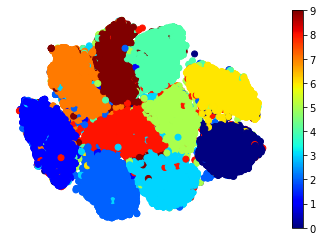

In [27]:
#Ahora realizo un grafico de dispersion con las clases de 0 al 9 con tsne
import matplotlib.pyplot as plt

#grafico de dispersion
plt.scatter(X_train_TNSE[:,0],X_train_TNSE[:,1],c=y_train.astype(int),cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

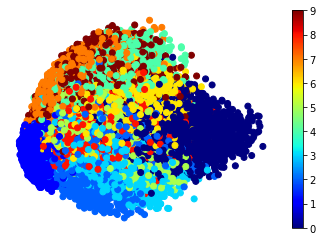

In [28]:
#Ahora realizo un grafico de dispersion con las clases de 0 al 9 con psa
import matplotlib.pyplot as plt

#grafico de dispersion
plt.scatter(X_train_reduced[:,0],X_train_reduced[:,1],c=y_train.astype(int),cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


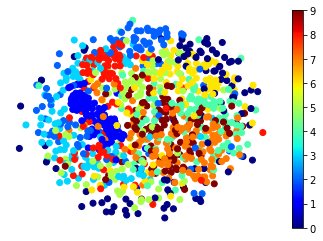

In [29]:
#Ahora hacer un grafico con un conjunto de datos reducido
from sklearn.manifold import MDS
X_reduced=X[:1000]
y_reduced=y[:1000]

#uso mds
mds=MDS(n_components=2)
X_train_mds=mds.fit_transform(X_reduced)

#Genero grafico de dispersion con el conjunto de datos reducidos
#grafico de dispersion
plt.scatter(X_train_mds[:,0],X_train_mds[:,1],c=y_reduced.astype(int),cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

# Preguntas teóricas
### Métodos de ensamble

1. Si ha entrenado cinco modelos diferentes en los mismos datos de entrenamiento y todos logran una precisión del 95%, ¿existe alguna posibilidad de combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?
2. ¿Cuál es la diferencia entre los clasificadores de votación hard y de votación soft?
3. ¿Es posible acelerar el entrenamiento de un conjunto de bagging distribuyéndolo en varios servidores? ¿Qué pasa con los conjuntos de pasting, los conjuntos de boosting, los Random Forest o los ensambles Stacking?
4. ¿Cuál es el beneficio de la evaluación out-of-bag (OOB)?
5. ¿Qué hace que los Extra-Trees sean más aleatorios que los Random Forest regulares? ¿Cómo puede esta aleatoriedad adicional ayudar? ¿Son los Extra-Trees más lentos o más rápidos que los Random Forest regulares?
6. Si su conjunto de AdaBoost no se ajusta lo suficientemente bien a los datos de entrenamiento, ¿qué hiperparámetros debe ajustar y cómo?
7. Si su conjunto de Gradient Boosting sobreajusta el conjunto de entrenamiento, ¿debería aumentar o disminuir la tasa de aprendizaje?




Métodos de ensamble

    Si ha entrenado cinco modelos diferentes en los mismos datos de entrenamiento y todos logran una precisión del 95%, ¿existe alguna posibilidad de combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?

Sí, existe la posibilidad de combinar estos modelos para obtener mejores resultados utilizando métodos de ensamble. Por ejemplo, se podría utilizar un clasificador de votación soft para combinar las predicciones de los cinco modelos, lo que podría aumentar la precisión del modelo combinado. Esto se debe a que los diferentes modelos pueden capturar diferentes aspectos de la relación entre las características y las etiquetas, y al combinar las predicciones de los modelos, se puede reducir el error de generalización.

    ¿Cuál es la diferencia entre los clasificadores de votación hard y de votación soft?

Un clasificador de votación hard elige la clase con mayor cantidad de votos entre los clasificadores base, mientras que un clasificador de votación soft utiliza las probabilidades de clase estimadas por cada clasificador base para hacer una predicción. En otras palabras, un clasificador de votación hard cuenta los votos, mientras que un clasificador de votación soft toma en cuenta la confianza de cada modelo base.

    ¿Es posible acelerar el entrenamiento de un conjunto de bagging distribuyéndolo en varios servidores? ¿Qué pasa con los conjuntos de pasting, los conjuntos de boosting, los Random Forest o los ensambles Stacking?

Sí, es posible acelerar el entrenamiento de un conjunto de bagging distribuyéndolo en varios servidores. Cada servidor podría entrenar un modelo base en un subconjunto aleatorio de los datos de entrenamiento y luego combinar los modelos base para crear el modelo final. Esta técnica se conoce como bagging paralelo. Lo mismo se puede aplicar a los conjuntos de pasting, Random Forest y ensambles Stacking. Sin embargo, la aceleración del entrenamiento en el boosting es más difícil debido a que cada modelo base se entrena en función de los errores del modelo anterior, lo que hace que la distribución en múltiples servidores sea complicada.

    ¿Cuál es el beneficio de la evaluación out-of-bag (OOB)?

La evaluación out-of-bag (OOB) es una técnica utilizada en el bagging que permite evaluar el modelo sin la necesidad de un conjunto de validación. Durante el entrenamiento, se utiliza una muestra aleatoria del conjunto de entrenamiento para cada modelo base, lo que implica que algunas instancias no se utilizan en el entrenamiento de cada modelo. Estas instancias no utilizadas se llaman instancias out-of-bag y se pueden utilizar para evaluar el modelo. La evaluación OOB proporciona una estimación sin sesgo del rendimiento del modelo en datos no vistos.

    ¿Qué hace que los Extra-Trees sean más aleatorios que los Random Forest regulares? ¿Cómo puede esta aleatoriedad adicional ayudar? ¿Son los Extra-Trees más lentos o más rápidos que los Random Forest regulares?

Los Extra-Trees (Extremely Randomized Trees) son más aleatorios que los Random Forest regulares porque en lugar de seleccionar las características óptimas para dividir cada nodo, utilizan una selección aleatoria de características. Además, las divisiones de nodos se realizan en puntos aleatorios para cada característica. Esta aleatoriedad adicional ayuda a reducir la varianza del modelo, lo que puede mejorar su rendimiento en datos no vistos. Los Extra-Trees son generalmente más rápidos que los Random Forest regulares, ya que la selección aleatoria de características reduce el tiempo necesario para encontrar la mejor característica para cada nodo.

    Si su conjunto de AdaBoost no se ajusta lo suficientemente bien a los datos de entrenamiento, ¿qué hiperparámetros debe ajustar y cómo?

Si el conjunto de AdaBoost no se ajusta lo suficientemente bien a los datos de entrenamiento, se pueden ajustar varios hiperparámetros, como la tasa de aprendizaje (learning rate) y el número de estimadores (n_estimators).

Aumentar la tasa de aprendizaje (learning rate) puede ayudar a hacer que el conjunto sea más sensible a los errores del modelo anterior y, por lo tanto, a reducir el sesgo. Aumentar el número de estimadores también puede mejorar el rendimiento del conjunto, permitiendo que el modelo tenga más oportunidades de ajustarse a los datos. También se pueden ajustar otros hiperparámetros, como el criterio de división de nodos (splitter) y la profundidad máxima del árbol (max_depth), para mejorar el rendimiento.

    Si su conjunto de Gradient Boosting sobreajusta el conjunto de entrenamiento, ¿debería aumentar o disminuir la tasa de aprendizaje?

Si el conjunto de Gradient Boosting sobreajusta el conjunto de entrenamiento, debería disminuir la tasa de aprendizaje para reducir la velocidad a la que se ajusta el modelo a los errores del modelo anterior. Al disminuir la tasa de aprendizaje, el modelo tendrá menos oportunidades de sobreajustar el conjunto de entrenamiento y, por lo tanto, debería generalizar mejor a los datos no vistos. También se pueden considerar otras técnicas para reducir el sobreajuste, como reducir la profundidad de los árboles o utilizar una muestra aleatoria de las características en cada iteración.





### Reducción dimensional
1. ¿Cuáles son las principales motivaciones para reducir la dimensionalidad de un conjunto de datos? ¿Cuáles son las principales desventajas?
2. ¿A qué se denomina la maldición de la dimensionalidad?
3. Una vez que se ha reducido la dimensionalidad de un conjunto de datos, ¿es posible revertir la operación? Si es así, ¿cómo? Si no, ¿por qué no?
4. ¿Se puede utilizar PCA para reducir la dimensionalidad de un conjunto de datos altamente no lineal?
5. Suponga que realiza PCA en un conjunto de datos de 1,000 dimensiones, estableciendo la relación de varianza explicada en un 95%. ¿Cuántas dimensiones tendrá el conjunto de datos resultante?
6. ¿En qué casos utilizaría PCA simple, PCA incremental, PCA aleatorio o kernel PCA?
7. ¿Cómo se puede evaluar el rendimiento de un algoritmo de reducción de dimensionalidad en su conjunto de datos?
8. ¿Tiene sentido encadenar dos algoritmos de reducción de dimensionalidad diferentes?



1-Las principales motivaciones para reducir la dimensionalidad de un conjunto de datos incluyen la reducción del tiempo de cálculo, la reducción del riesgo de sobreajuste y la mejora de la interpretabilidad de los datos. Las principales desventajas incluyen la posible pérdida de información y la posibilidad de introducir ruido o distorsiones no deseadas en los datos.

2-La maldición de la dimensionalidad se refiere al fenómeno en el que la dificultad de analizar datos aumenta exponencialmente con el número de dimensiones.

3-Sí, es posible revertir la operación de reducir la dimensionalidad de un conjunto de datos. Esto se puede hacer aplicando una transformación inversa a los datos reducidos, utilizando el mismo método que se utilizó para reducir la dimensionalidad en primer lugar.

4-Sí, PCA se puede usar para reducir la dimensionalidad de un conjunto de datos altamente no lineal, aunque puede que no sea el método más efectivo en este caso. Otros métodos, como el PCA kernel o el t-SNE, pueden ser más apropiados para conjuntos de datos altamente no lineales.

5-El número de dimensiones en el conjunto de datos resultante dependerá del número de componentes principales necesarios para explicar el 95% de la varianza en los datos. Este número probablemente será menor que 1000, pero el número exacto dependerá del conjunto de datos específico.

6-El PCA "vanilla" es apropiado para conjuntos de datos con una estructura lineal y una dimensionalidad moderada a alta. El PCA incremental es útil para conjuntos de datos grandes que no se pueden cargar en memoria de una sola vez. El PCA aleatorio es útil para conjuntos de datos grandes con muchas características, donde la solución exacta es computacionalmente inviable. El PCA kernel es apropiado para conjuntos de datos no lineales.

7-El rendimiento de un algoritmo de reducción de dimensionalidad se puede evaluar midiendo cómo preserva la estructura de los datos. Esto se puede hacer comparando los datos reducidos con los datos originales utilizando métricas como la relación de varianza explicada o el error de reconstrucción.

8-Encadenar dos algoritmos de reducción de dimensionalidad diferentes a veces puede ser beneficioso, especialmente cuando cada método es más adecuado para un aspecto diferente de los datos. Sin embargo, se debe tener cuidado para garantizar que los datos reducidos resultantes sigan siendo interpretables y útiles para el análisis previsto